In [1]:
PATH = './experiments'

In [2]:
import pandas as pd

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import pickle
import itertools

from pathlib import Path as PPath
from multiprocessing import Pool

from genetic.data_definitions import CartesianPoint, Mapa, Version
from genetic.visualization import plot_map, vis_mapa

from genetic.genetic import Genetic, Subject

import ast

from math import sqrt

In [4]:
    wp_ori = CartesianPoint(0, 0)
    wp_des = CartesianPoint(0, -10)

### Open maps

#### read sgl

In [5]:
def sgl_read_areas(lines):
    """From the map file definition reads each area"""

    lines = iter(lines)
    next(lines)  # <number of polygons>
    next(lines)  # 20

    areas = []

    for line in lines:
        Xs = [float(n) for n in re.sub(r"\n", "", next(lines)).split(",")]
        Ys = [float(n) for n in re.sub(r"\n", "", next(lines)).split(",")]

        areas.append([CartesianPoint(x, y) for x, y in zip(Xs, Ys)])

    return areas


def read_sgl(path, **kwargs):
    with open(path, "r") as f:
        lines = f.readlines()
        map = Mapa(
            wp_ori, wp_des, sgl_read_areas(lines), **kwargs
        )  # inflation_rate=1, mode='scalar'
    return map



In [18]:

def vis_mapa_1(mapa, route=None, **qwargs):
    areas = [area for area in itertools.chain(mapa.areas_n, mapa.areas_n_inf)]
    tipos = ["n" for _ in range(len(areas))]

    kwargs = {
        "areas": areas,
        "labels": tipos,
        "origem": mapa.origin,
        "destino": mapa.destination,
    }

    if route:
        kwargs["waypoints"] = route

    kwargs.update(qwargs)

    plot_map(**kwargs)

#### open

In [16]:
mapa = read_sgl('./maps/NonRegular/07.sgl')

### Open AG Results

In [51]:
with open(PATH+'/mode_C/map_07/mode_C_map_07_exec_1_history.csv') as f:
    df = pd.read_csv(f)

Get best individual of all times

In [52]:
df.min()

id                                                               0
generation                                                       0
parents                                                    [0, 17]
fitness                                                    59.8763
fitness_trace    [0, 0, 10.055534974066706, 1.5536212479653853,...
birth_time                                             0.000854731
route            [[0, 0], [-0.006013470162848422, 0.0], [0.5852...
dtype: object

Entre as feasible, quando uma distância de dois metros foi atingida pela primeira vez


In [63]:
df.loc[ast.literal_eval(df['fitness_trace'])[0] <= 2]

ValueError: malformed node or string: 0       [11.17793287444541, 1, 28.20260842523725, 12.2...
1       [15.659860998884467, 0, 7.243629704017147, 4.6...
2       [8.863418475460408, 6, 7.628667684018014, 4.52...
3       [22.02831975728349, 3, 30.270422067245732, 10....
4       [13.118502821907454, 2, 9.536354347143888, 3.4...
                              ...                        
1433    [20.07064725706795, 0, 20.267225602823064, 5.3...
1434    [8.713692829688267, 3, 23.317982141532205, 9.8...
1435    [9.8576223279368, 0, 3.769035237350941, 2.0425...
1436    [8.566904859457328, 1, 23.94809130144773, 7.62...
1437    [7.141001720888597, 0, 16.788180785123963, 6.6...
Name: fitness_trace, Length: 1438, dtype: object

In [60]:
df.loc[df['birth_time'] <= 10]

,id,generation,parents,fitness,fitness_trace,birth_time,route
0,0,0,[],2389.928359,"[11.17793287444541, 1, 28.20260842523725, 12.2...",0.000855,"[[0, 0], [-0.6604046781493458, 0.0], [-2.34315..."
1,1,0,[],1683.636270,"[15.659860998884467, 0, 7.243629704017147, 4.6...",0.000905,"[[0, 0], [-0.20265902511212164, 0.0], [-0.8118..."
2,2,0,[],6977.011567,"[8.863418475460408, 6, 7.628667684018014, 4.52...",0.000943,"[[0, 0], [-0.5906587275916362, 0.0], [-1.34717..."
3,3,0,[],5470.233984,"[22.02831975728349, 3, 30.270422067245732, 10....",0.001142,"[[0, 0], [0.11603403511987964, 0.0], [0.250727..."
4,4,0,[],3424.509914,"[13.118502821907454, 2, 9.536354347143888, 3.4...",0.001181,"[[0, 0], [-0.9538378368488016, 0.0], [-3.28012..."
...,...,...,...,...,...,...,...
65,65,13,"[63, 49]",852.926359,"[8.087621734746023, 0, 1.6284437277915753, 1.5...",9.241632,"[[0, 0], [0.6339470749421265, 0.0], [0.6478365..."
66,66,14,"[49, 58]",619.385798,"[5.838729967193788, 0, 3.8854879111730103, 1.7...",9.740254,"[[0, 0], [0.6307764278245998, 0.0], [-0.290370..."
67,67,14,"[52, 61]",558.140742,"[5.12823711207398, 0, 5.482990610853428, 1.637...",9.795699,"[[0, 0], [0.1651749026371918, 0.0], [-0.073874..."
68,68,14,"[61, 67]",602.122827,"[5.569532970842318, 0, 5.25012942921268, 1.722...",9.966427,"[[0, 0], [0.1651749026371918, 0.0], [-0.073874..."


In [59]:
df.loc[df['fitness'] <= 1000]

,id,generation,parents,fitness,fitness_trace,birth_time,route
10,10,1,"[5, 5]",924.969805,"[9.03236855352484, 0, 1.6931235276480812, 1.43...",0.409300,"[[0, 0], [0.6307764278245998, 0.0], [0.1041727..."
12,12,1,"[6, 10]",960.263114,"[9.288309259190198, 0, 3.943019661106546, 2.36...",0.934111,"[[0, 0], [0.48618973401389004, 0.0], [-0.02294..."
13,13,1,"[10, 12]",918.429607,"[8.966217425923471, 0, 1.620052856994258, 1.32...",0.936085,"[[0, 0], [0.6307764278245998, 0.0], [0.0683792..."
15,15,1,"[14, 12]",856.158636,"[7.935884160555303, 0, 7.305734219210633, 3.46...",1.073686,"[[0, 0], [-0.5906587275916362, 0.0], [-1.62396..."
16,16,1,"[12, 12]",790.498880,"[7.550584827938881, 0, 4.577814470001013, 1.69...",1.228892,"[[0, 0], [-0.9347091074574787, 0.0], [-2.83709..."
...,...,...,...,...,...,...,...
1426,1426,227,"[1425, 1423]",69.909564,"[0, 0, 14.296059113858675, 1.4744172930213435,...",181.602016,"[[0, 0], [-0.3449256434002651, 0.0], [-0.56894..."
1427,1427,228,"[1422, 1416]",59.876298,"[0, 0, 11.319755729620221, 1.18229888042266, 5...",182.042019,"[[0, 0], [-0.3449256434002651, 0.0], [-0.56894..."
1428,1428,229,"[1426, 1339]",69.904783,"[0, 0, 14.301531495612469, 1.4678644980063282,...",182.619516,"[[0, 0], [-0.3449256434002651, 0.0], [-0.56894..."
1431,1431,230,[],912.999357,"[8.583851463647179, 0, 4.218946106399424, 2.33...",184.345255,"[[0, 0], [-0.049117097935836185, 0.0], [-0.624..."


In [47]:
df

,id,generation,parents,fitness,fitness_trace,birth_time,route
0,0,0,[],30.200291,"[0, 0, 1.0871677939078304, 0.8807276518905018,...",0.001303,"[[0, 0], [-0.521336693967495, 0.0]]"
1,1,0,[],454.212692,"[0, 0, 16.637050632718793, 9.582808790399174, ...",0.001390,"[[0, 0], [-0.7926210202040045, 0.0], [-1.25974..."
2,2,0,[],30591.845078,"[0, 3, 27.81006249365325, 10.27051473970385, 1...",0.001476,"[[0, 0], [0.5359352173588243, 0.0], [0.6527103..."
3,3,0,[],316.403596,"[0, 0, 12.08155772390332, 6.718621562377891, 1...",0.001527,"[[0, 0], [0.42565201014661636, 0.0], [-0.39332..."
4,4,0,[],358.779953,"[0, 0, 18.663138909246886, 5.351279303024729, ...",0.001565,"[[0, 0], [0.3546587008110953, 0.0], [0.0619284..."
...,...,...,...,...,...,...,...
6876,6876,273,[],60640.857636,"[0, 6, 33.43801192188862, 8.813664517179461, 1...",183.783801,"[[0, 0], [-0.2317177282889451, 0.0], [-0.29184..."
6877,6877,273,[],30488.291458,"[0, 3, 20.197063711824107, 7.457835679043094, ...",183.783877,"[[0, 0], [0.4480615468416804, 0.0], [0.4969665..."
6878,6878,273,[],311.584495,"[0, 0, 14.141606135230115, 5.23013777712718, 1...",183.783924,"[[0, 0], [-0.3028343602800634, 0.0], [-1.81451..."
6879,6879,273,[],166.874087,"[0, 0, 8.341576863804343, 1.9681732936034244, ...",183.783950,"[[0, 0], [-0.030387623609418712, 0.0], [-0.335..."


In [55]:
bestindex = 608

In [56]:
for stat in df.loc[bestindex]:
    print(stat)

608
100
[602, 551]
59.9396352838589
[0, 0, 11.118697198341355, 1.2211669038686344, 5, 9.939635283858896]
82.92323637008667
[[0, 0], [-0.3449256434002651, 0.0], [-0.5689492492853799, -1.3526426936712386], [0.10443486214919764, -4.329722121250567], [1.2510721983643975, -7.483438270637149], [0.43803871328432803, -9.106888876317708]]


Get best's route

In [27]:
route = df.loc[bestindex]['route']
route = ast.literal_eval(route)

### vis_mapa

In [28]:
route

[[0, 0], [3.13027704872601e-16, 0.0]]

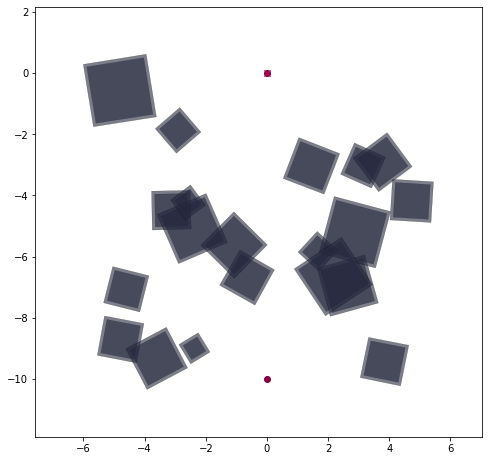

In [29]:
vis_mapa_1(mapa, route)

# AG

In [56]:
import pickle

In [30]:
with open(PATH+'/mode_EMC_map_07_exec_1_ag.p', 'rb') as f:
    ag = pickle.loads(f.read())

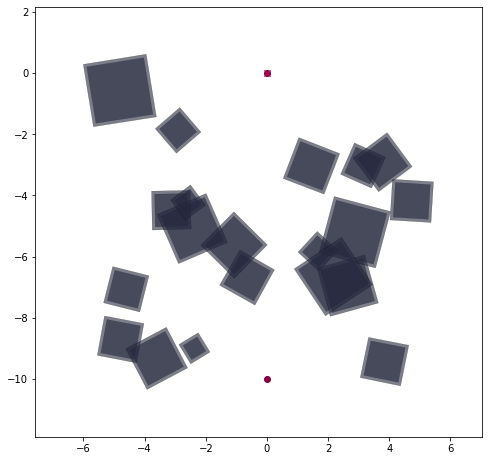

In [31]:
vis_mapa_1(mapa, ag.best.get_route())

In [46]:
names = ['fit_d', 'fit_obs', 'fit_con', 'fit_cur', 'fit_t', 'fit_dist', 'fit_z_bonus']
for i, j in zip(ag.best.fitness_trace, names):
    print(f'{j:11}: {i:}')

fit_d      : 000
fit_obs    : 000
fit_con    : 1.362776994765863e-31
fit_cur    : 6.490990152041533e-17
fit_t      : 001
fit_dist   : 1.8457904775230198e-16
fit_z_bonus: 000


In [39]:
print(ag.C_z_bonus)
print(ag.C_d)
print(ag.C_obs)
print(ag.C)
print(ag.)
print(ag.)

-10000

In [123]:
ag.best.fitness

714.7468514527092

### Fitness debug

In [105]:
__fitness_destination(ag.best, mapa) * 700 # * C_dest

4933.075661705765

In [103]:
min_precision = 1
def __fitness_destination(subject, mapa):
        # Prioriza rotas que acertem o destino

        A = subject.dna_decoded[-1]  # Último waypoint da rota
        B = mapa.destination  # Waypoint de destino

        # Distância euclidiana entre o último ponto da rota e o ponto de destino
        d = sqrt((B.x - A.x) ** 2 + (B.y - A.y) ** 2)

        # Determina uma precisão mínima aceita
        if d < min_precision:  # min_precision default = 1.0
            return 0
        return d